In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#기본세팅

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
!sudo apt-get install -y fonts-nanum # 맥만 폰트설정될겁니다
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


In [5]:
# 음수부호 표시하도록 설정
plt.rc("axes", unicode_minus = False)

# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, '테스트')

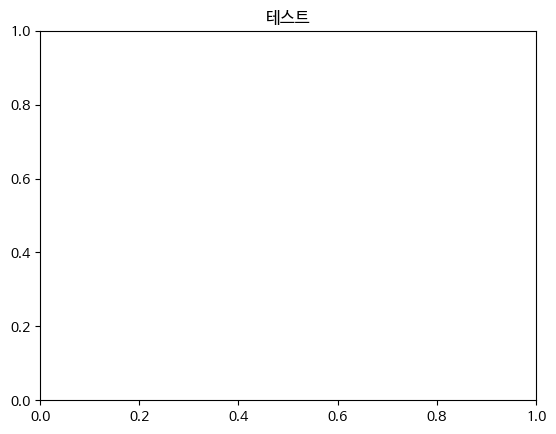

In [6]:
# 한글 출력 잘되는지 테스트
plt.title('테스트')

#데이터 준비

In [7]:
df = pd.read_csv('/content/drive/MyDrive/24-1/데모마/팀플/데이터/SeoulBikeData.csv', encoding ='cp949')

In [8]:
df['Date'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')

In [9]:
# 연/월/일 분리해주기
import datetime as dt
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [10]:
# 컬럼명 정리
df.rename(columns={'Temperature(캜)' : 'Temperature',
                   'Dew point temperature(캜)' : 'Dew_point_temperature',
                   'Humidity(%)' : 'Humidity',
                   'Solar Radiation (MJ/m2)' : 'Solar_radiation',
                   'Rainfall(mm)' : 'Rainfall',
                   'Snowfall (cm)' : 'Snowfall',
                   'Wind speed (m/s)' : 'Wind_speed',
                   'Visibility (10m)' : 'Visibility',
                   'Functioning Day' : 'Functioning_day',
                   'Rented Bike Count' : 'Rented_bike_count'}, inplace=True)

In [11]:
df['Fall'] = df['Rainfall'] + df['Snowfall']

In [12]:
df

,Date,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_day,Year,Month,Day,Fall
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,0.0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,0.0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,0.0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,0.0
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,0.0
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,0.0
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,0.0
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,0.0


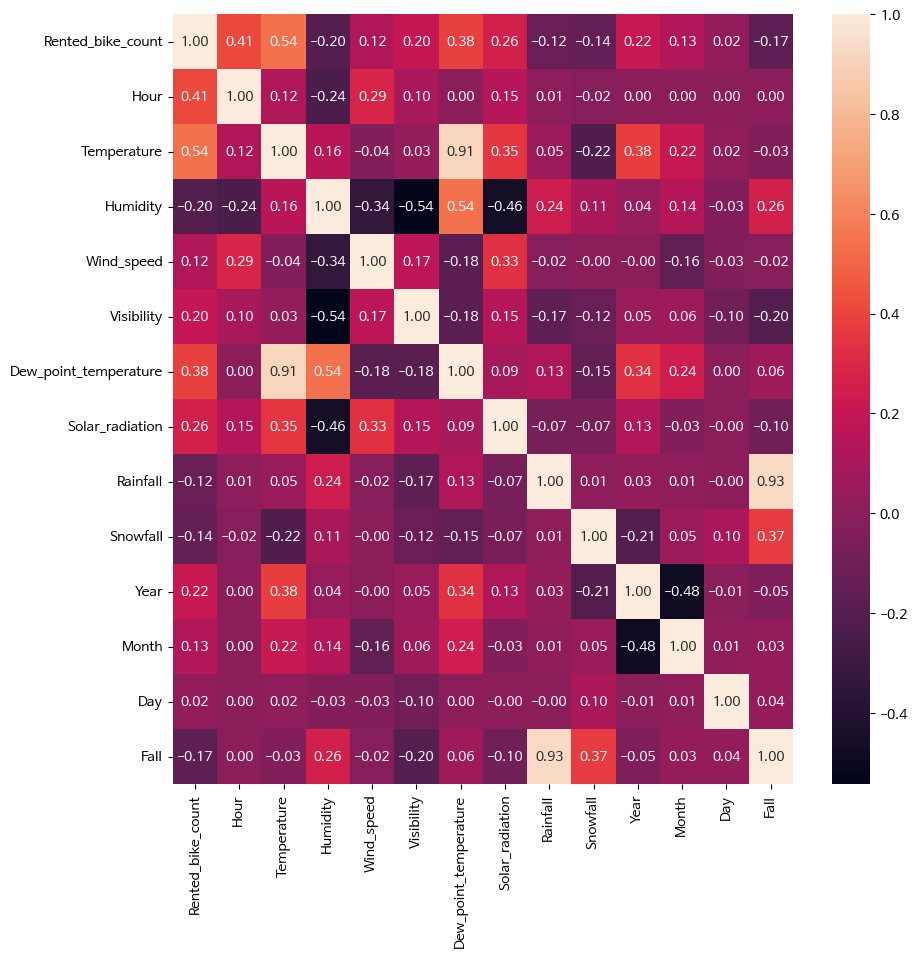

In [13]:
corr= df[['Rented_bike_count', 'Hour','Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature',
    'Solar_radiation', 'Rainfall', 'Snowfall','Year', 'Month', 'Day', 'Fall']].corr()


plt.figure(figsize=(10,10))
sns.heatmap(corr,
            annot= True,
            fmt='.2f')

# dew_point_temperature 와 temperature의 상관계수 값이 0.91임으로 다중공선성 문제 발생 가능 > dew_point_temperature 독립변수에서 제외
df.drop('Dew_point_temperature', axis=1, inplace=True)

In [14]:
df.dtypes

Date                 datetime64[ns]
Rented_bike_count             int64
Hour                          int64
Temperature                 float64
Humidity                      int64
Wind_speed                  float64
Visibility                    int64
Solar_radiation             float64
Rainfall                    float64
Snowfall                    float64
Seasons                      object
Holiday                      object
Functioning_day              object
Year                          int32
Month                         int32
Day                           int32
Fall                        float64
dtype: object

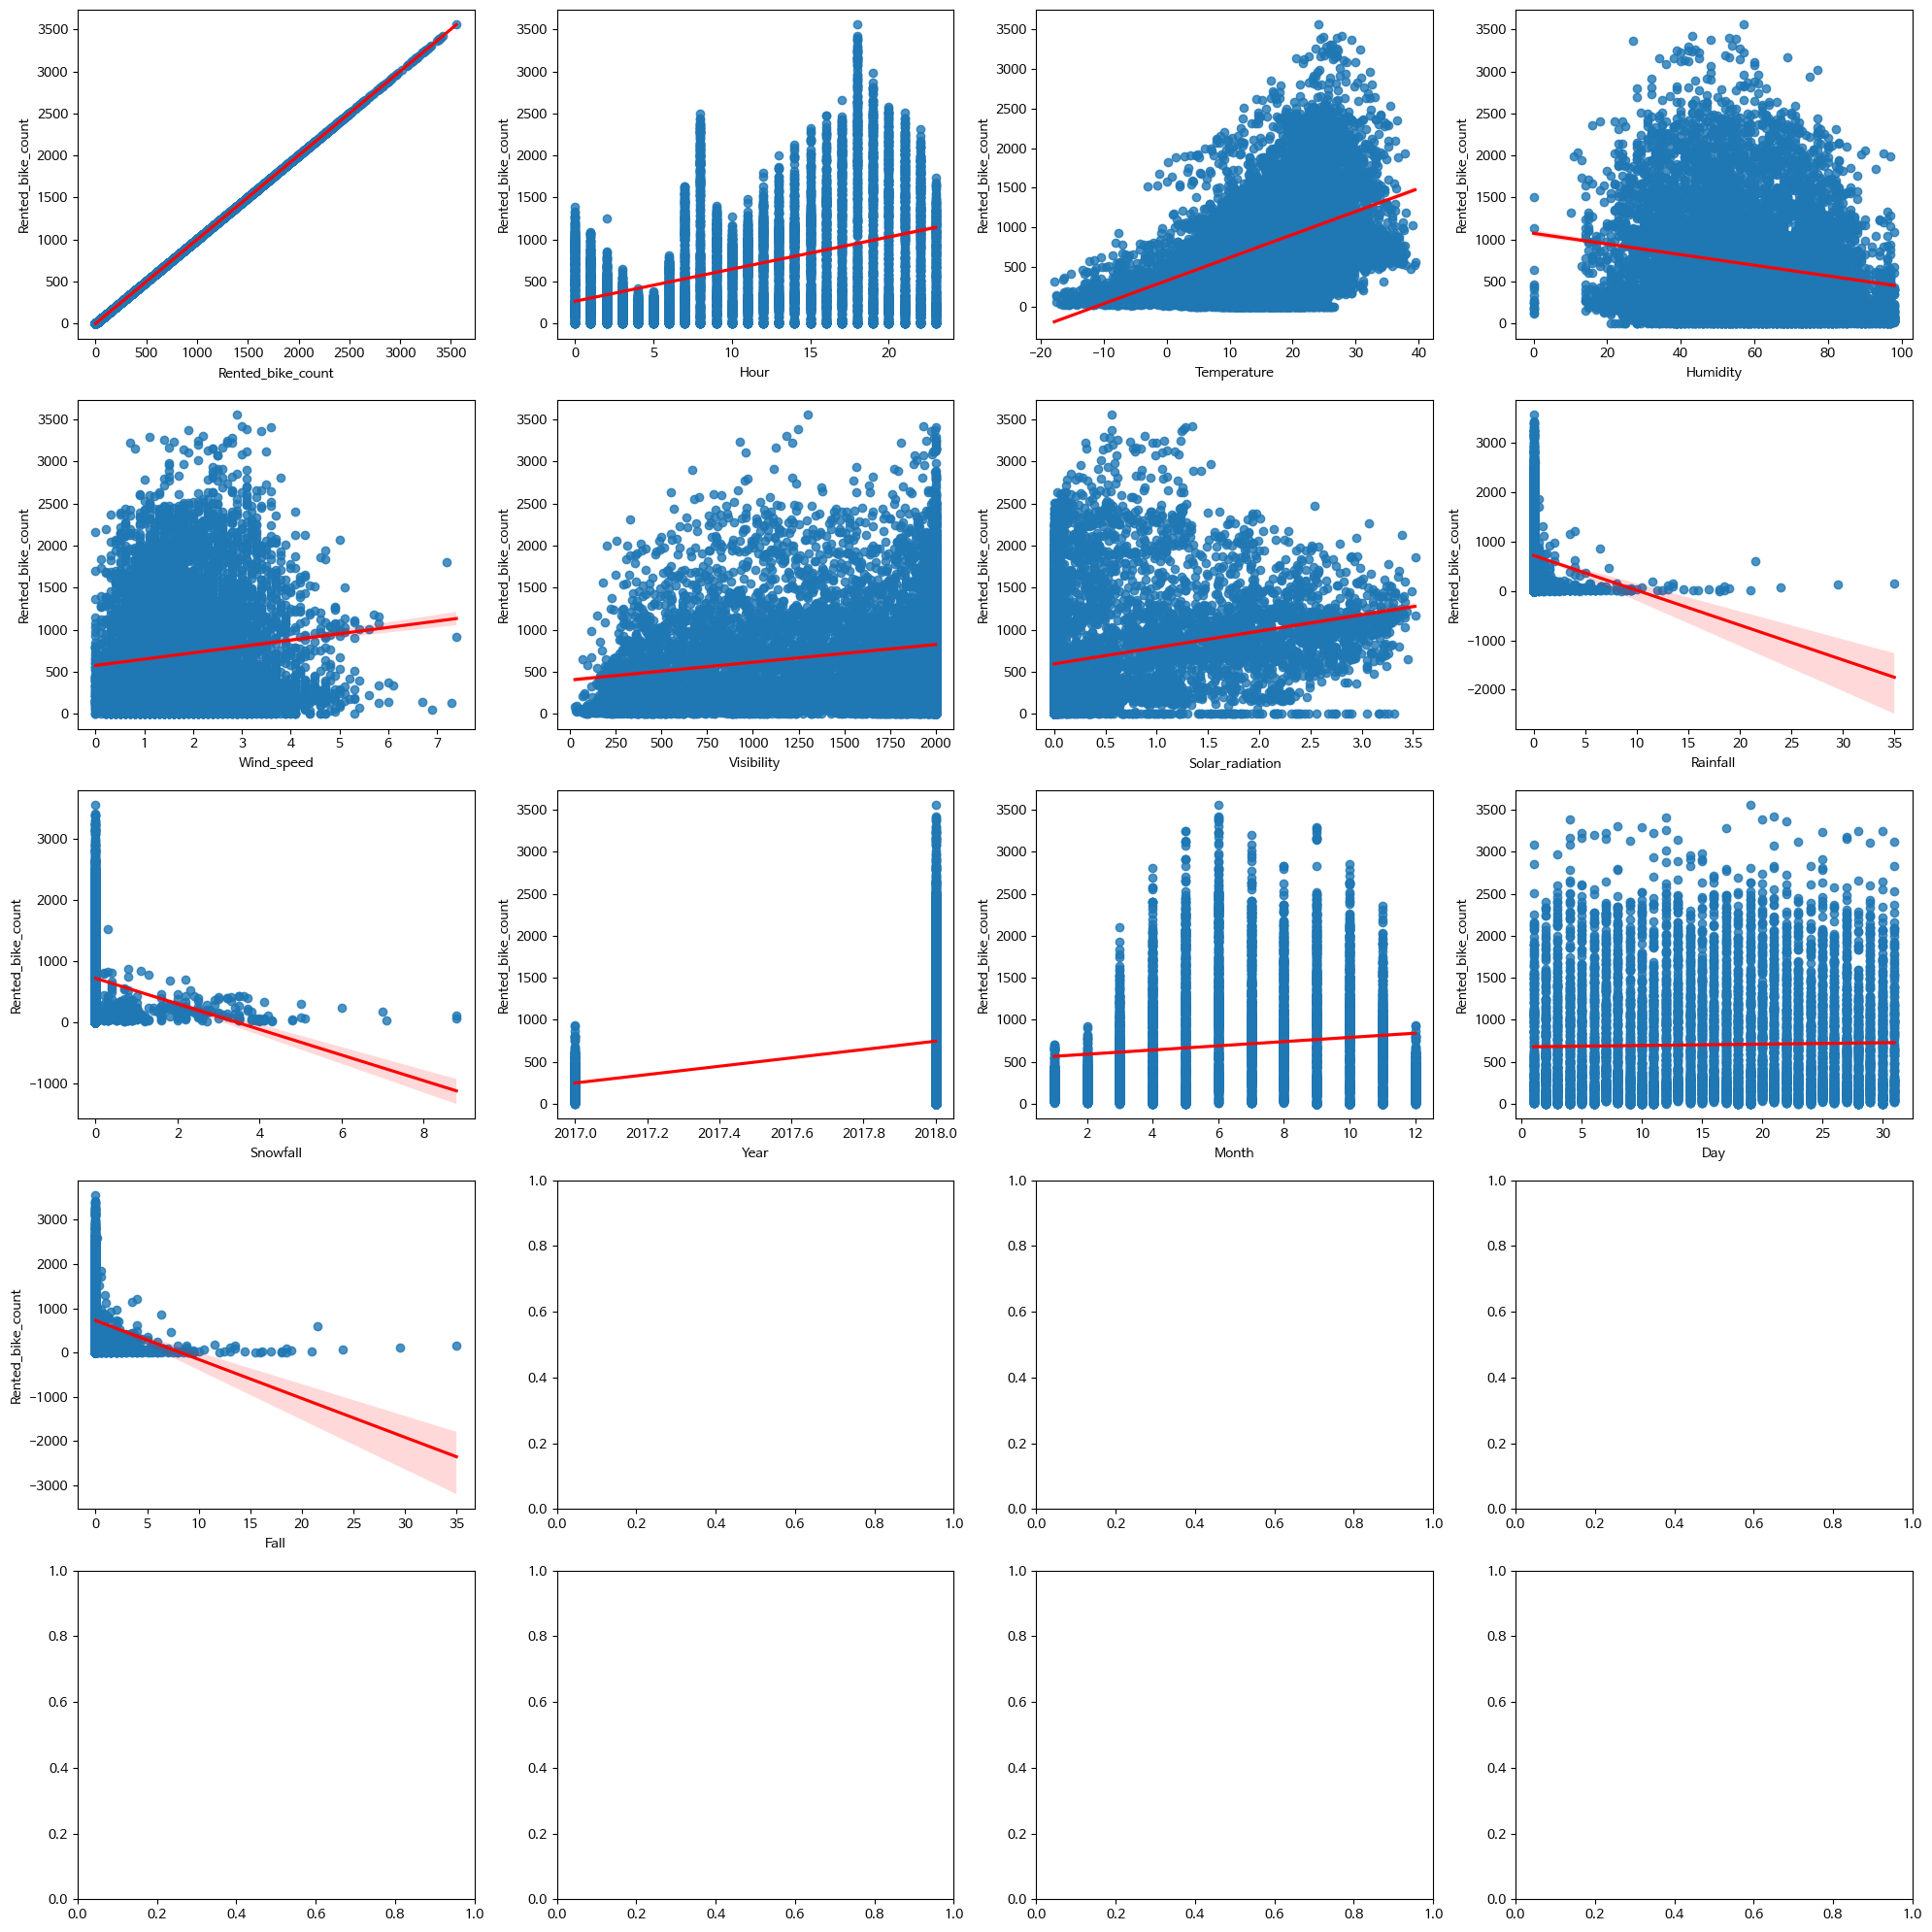

In [18]:
int_float_col = df.select_dtypes(include=['int', 'float'])
int_float_cols = int_float_col.columns

fig, ax = plt.subplots(5, 4, figsize=(20, 20))

for i, col in enumerate(int_float_cols):
    sns.regplot(x=df[col], y=df['Rented_bike_count'], ax=ax[i//4, i%4], line_kws={'color': 'red'})
    ax[i//4, i%4].set_xlabel(col)
    ax[i//4, i%4].set_ylabel('Rented_bike_count')

plt.tight_layout()
plt.show()

In [29]:
df.select_dtypes(include='object')

,Seasons,Holiday,Functioning_day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


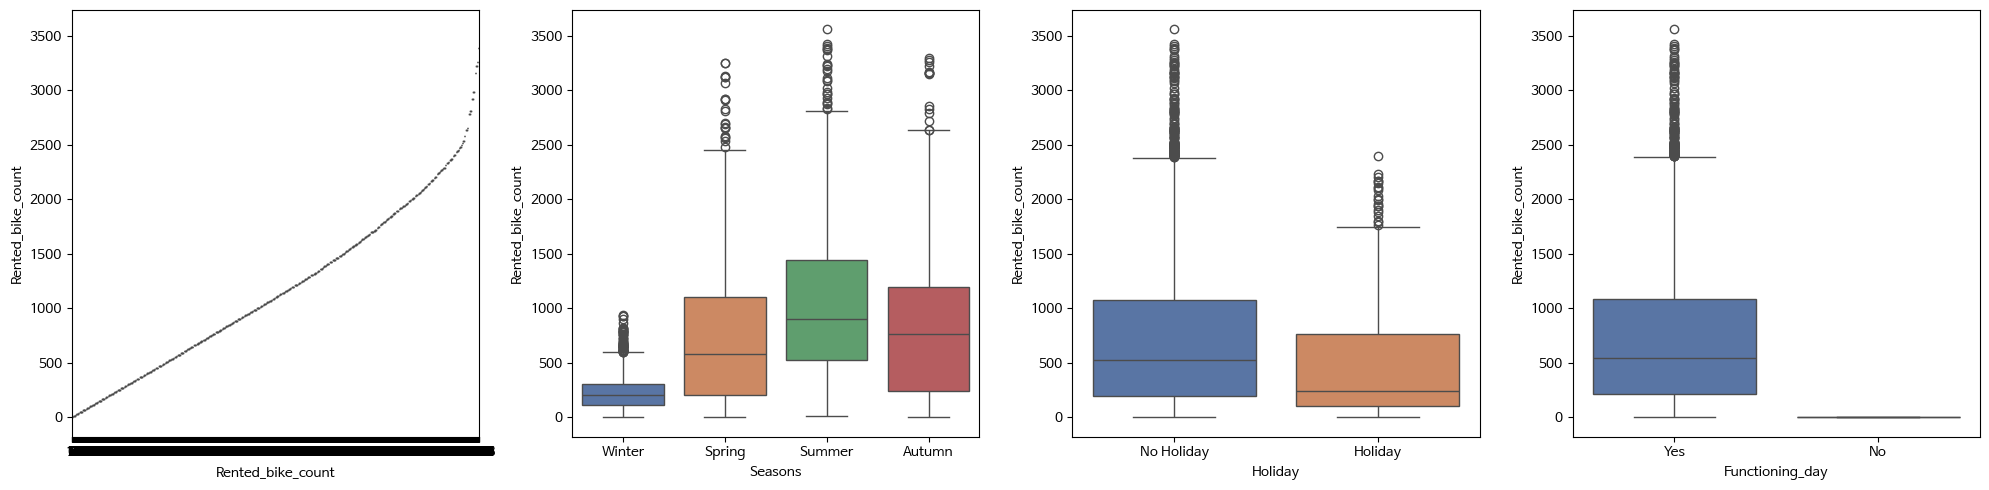

In [32]:
object_col = df[['Rented_bike_count', 'Seasons', 'Holiday', 'Functioning_day']]
object_cols = object_col.columns

fig, ax = plt.subplots(1, 4, figsize=(20, 5))

for i, col in enumerate(object_cols):
    sns.boxplot(x=df[col], y=df['Rented_bike_count'], ax=ax[i],
                palette='deep')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Rented_bike_count')

plt.tight_layout()
plt.show()

# 피처엔지니어링

In [109]:
df['hot_humid'] = df['Temperature'] * df['Humidity']

df[['Rented_bike_count', 'hot_humid']].corr()

,Rented_bike_count,hot_humid
Rented_bike_count,1.000000,0.357094
hot_humid,0.357094,1.000000


# 범주형 변수들 인코딩하기

In [37]:
df.drop('Date',axis=1,inplace=True)

In [66]:
df=pd.get_dummies(df)

In [67]:
df

,Rented_bike_count,Hour,Temperature,Humidity,Wind_speed,Visibility,Solar_radiation,Rainfall,Snowfall,Year,...,Day,Fall,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning_day_No,Functioning_day_Yes
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,2017,...,1,0.0,False,False,False,True,False,True,False,True
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,2017,...,1,0.0,False,False,False,True,False,True,False,True
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,2017,...,1,0.0,False,False,False,True,False,True,False,True
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,2017,...,1,0.0,False,False,False,True,False,True,False,True
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,2017,...,1,0.0,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,0.0,0.0,0.0,2018,...,30,0.0,True,False,False,False,False,True,False,True
8756,764,20,3.4,37,2.3,2000,0.0,0.0,0.0,2018,...,30,0.0,True,False,False,False,False,True,False,True
8757,694,21,2.6,39,0.3,1968,0.0,0.0,0.0,2018,...,30,0.0,True,False,False,False,False,True,False,True
8758,712,22,2.1,41,1.0,1859,0.0,0.0,0.0,2018,...,30,0.0,True,False,False,False,False,True,False,True


# 모델링하기

In [68]:
# 2018_6월 = test_y
test_x = df.loc[(df['Year'] == 2018) & (df['Month'] == 6)]
test_x
test_y = test_x['Rented_bike_count']
test_X = test_x.drop('Rented_bike_count',axis=1)

In [69]:
train_X = df.drop(test_x.index)
train_X

train_y = train_X['Rented_bike_count']
train_X.drop('Rented_bike_count', axis=1, inplace=True)

In [72]:
print(train_X.shape)
print(test_X.shape)

print(train_y.shape)
print(test_y.shape)

(8040, 20)
(720, 20)
(8040,)
(720,)


In [74]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

train_scaled = ss.fit_transform(train_X)
test_scaled= ss.fit_transform(test_X)

In [89]:
from sklearn.model_selection import train_test_split

# 데이터를 훈련 세트와 테스트 세트로 분할
train_input, val_input, train_target, val_target = train_test_split(train_X, train_y,random_state=42)

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score


##선형회귀

In [92]:
lr= LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(val_input, val_target))



0.5708179578016974
0.5574603049672523


## K-fold + 선형회귀


In [90]:
# Kfold + 선형회귀
from sklearn.model_selection import RandomizedSearchCV, cross_validate
scores = cross_validate(lr, train_X, train_y, cv=5, return_train_score=True)
print(scores['train_score'].mean())
print(scores['test_score'].mean())#?

0.5724644545526972
-0.8183427039331062


## 랜덤포레스트

In [103]:
# Kfold + RandomForest

rf = RandomForestRegressor()
rf.fit(train_input, train_target)

print('train_score:', rf.score(train_input,train_target))
print('valid_score:', rf.score(val_input,val_target))

mse = mean_squared_error(val_target, rf.predict(val_input))
print('rmse :' ,np.sqrt(mse))

train_score: 0.9831645091068321
valid_score: 0.8730125305899272
rmse : 214.89348471645687


## LGBM 회귀

In [105]:
# LGBM회귀
from lightgbm import LGBMRegressor

lgbm = LGBMRegressor()

lgbm.fit(train_input, train_target)
print('train_score:', lgbm.score(train_input,train_target))
print('valid_score:', lgbm.score(val_input,val_target))

mse = mean_squared_error(val_target, lgbm.predict(val_input))
print('rmse :' ,np.sqrt(mse))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001545 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data points in the train set: 6030, number of used features: 20
[LightGBM] [Info] Start training from score 659.618408
train_score: 0.9430980392792669
valid_score: 0.8875102634228389
rmse : 202.254998724963
